<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #8: Agrupación de textos
`Fecha de entrega: Abril 29, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [104]:
! pip install plotly
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [105]:
# Cargar datos
data = pd.read_csv("reviews_vidjew_es.csv")
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


###  `[10 pts]` Punto 1: Hacer pre-procesamiento del texto

In [106]:
stopwords_sp = stopwords.words('spanish')
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())

###  `[10 pts]` Punto 2: Método del codo para determinar $K$

In [107]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [108]:
ks = []
k_inertias = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

C:\Users\57314\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



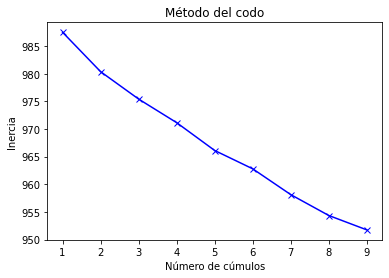

In [109]:
# list(zip(ks,k_inertias))

plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertias, 'bx-');

###  `[10 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [110]:
k = 5
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=5)

In [111]:
KMeans(n_clusters=5)

KMeans(n_clusters=5)

In [112]:
data['cluster'] = model.labels_
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,3
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,1
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,0
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,2
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,2


###  `[15 pts]` Punto 4: Interpretación de los clusters

In [113]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroids = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()
    
    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    
    print(f"DOCUMENTOS MÁS REPRESENTATIVOS")
    for vecino in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]].review_body.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("********************************************")
    print()

Cluster # 0
Tiene 546 registros (54.60% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
juego bonito si foto regalo bonitos mando queda esperaba pulsera mal solo jugar tiempo tal pequeños mas gusta grandes plata 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Esperaba más del juego.

 *** Bonito fue para un regalo y bien

 *** Un juego para mi hijo. No se ha pasado mucho tiempo jugando con él. No puedo opinar mucho más sobre este juego.


********************************************

Cluster # 1
Tiene 57 registros (5.70% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
perfecto llegó tiempo tamaño gracias producto sido rápido juego castellano recomendable rapido poner funciona igual justo funcionar buen encanta precio 

DOCUMENTOS MÁS REPRESENTATIVOS
 *** Todo en perfecto estado

 *** Perfecto y en tiempo

 *** Llegó a tiempo y en perfecto estado


********************************************

Cluster # 2
Tiene 108 registros (10.80% de los datos)

TÉRMINOS MÁS REPRESENTATIVOS
bien precio cadena bonito qu

CLUSTERS:

Cluster 0:
COUNT  52 comments (5.20% of the data)
TERMS  perfecto llegó tiempo gracias sido rápido justo juego tamaño producto recomendable rapido poner funciona igual funcionar buen mano castellano encanta 
REPRESENTATIVE COMMENTS
* Todo en perfecto estado
* Perfecto y en tiempo
* Llegó a tiempo y en perfecto estado


Cluster 1:
COUNT  211 comments (21.10% of the data)
TERMS  bien juego bastante aunque cadena funciona si viene español caja dos jugar solo producto mas regalo precio ps así imagen 
REPRESENTATIVE COMMENTS
* Está bien por su precio
* Por el precio que tiene está muy bien
* Esta bien,fue un regalo


Cluster 2:
COUNT  551 comments (55.10% of the data)
TERMS  producto llegado si buen regalo día mas bonitos foto mando bonita llego pulsera solo plata llegó pequeños tiempo mal amazon 
REPRESENTATIVE COMMENTS
* El producto ha llegado antes de lo previsto, me ha gustado su calidad es más pequeño de lo esperado pero me gusta. Vale la pena.
* No ha llegado el collar . La

###  `[BONUS: 3 pts]` Visualización usando PCA

In [115]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.review_body.apply(lambda val: val[:140])

colorsIdx = {0: 'blue',
             1: 'yellow',
             2: 'green',
             3: 'red',
             4: 'orange'}

result['colores'] = result['cluster'].map(colorsIdx)


result.head()

,X,Y,cluster,texto,colores
0,0.486035,-0.321769,3,"Buen. Buena calidad, y buena presentación.",red
1,-0.107201,-0.148258,1,"Un producto a perfecto, para salir de casa con...",yellow
2,-0.071399,-0.029316,0,No funciona con Nintendo Switch. No hay forma ...,blue
3,0.031614,0.234321,2,"Recomendado, los utilizo para pc y no me dan n...",green
4,0.016403,0.097471,2,El cable funciona bien podria ser un poco mas ...,green


In [116]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Comparación

### `[BONUS 20 pts (validos para cualquier tarea)]` 
### Hacer predicción para estas dos frases de los dos modelos (clasificación y $k$-means)

In [117]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevo_trans = tfidf_vect.transform(test)
model.predict(nuevo_trans)

array([0, 3])

In [118]:
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,3
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,1
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,0
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,2
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,2


In [119]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)
stopwords_sp = stopwords.words('spanish')
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.cluster.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.cluster.values
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
nb = MultinomialNB()
logreg = LogisticRegression()
svm = LinearSVC()
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)

LinearSVC()

In [120]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)

print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()

print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()

print("SVM")
print(classification_report(y_test, y_pred_svm))
print()

Naive Bayes
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       113
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        21
           3       1.00      0.23      0.37        22
           4       1.00      0.23      0.37        31

    accuracy                           0.62       200
   macro avg       0.52      0.29      0.30       200
weighted avg       0.60      0.62      0.52       200


Regresión Logística
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       113
           1       1.00      0.23      0.38        13
           2       1.00      0.52      0.69        21
           3       0.90      0.82      0.86        22
           4       0.85      0.55      0.67        31

    accuracy                           0.81       200
   macro avg       0.90      0.62      0.69       200
weighted avg       0.84      0.81      0.79 

C:\Users\57314\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\57314\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\57314\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [121]:
confusion_matrix(y_test, y_pred_svm)

array([[109,   0,   0,   3,   1],
       [  2,  10,   0,   1,   0],
       [  2,   0,  16,   2,   1],
       [  1,   1,   0,  19,   1],
       [  6,   0,   0,   0,  25]], dtype=int64)

In [122]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevo_trans = tfidf_vect.transform(test)
svm.predict(nuevo_trans)

array([0, 3])

### `[5 pts]` Punto 5: Preguntas

- Según los resultados del $K$-Means, ¿cuál es la estructura de los datos?
- ¿Qué diferencia notó entre los resultados del taller pasado y este?
- ¿Alguna otra observación?

1. La estructura de los 5 clustes se basa en: clustes 0 es de juegos, cluster 1 el tiempo y la perfección, clustes 2 el precio y un cliente conforme, cluster 3 en la calidad y el cluster 4 en el producto en este caso las joyas.
2. La primera diferencia entre el taller pasado y este es que en el anterior existía etiqueta en la variable dependiente, es decir, se tenían definidas dos clases, en esta ocasión con k-means se definió que lo mejor era separar en 5 clases, la otra diferencia es que en el taller pasado se decidió por un modelo de Regresión logística y en esta ocasión el mejor fue svm.
3. Al realizar los dos modelos svm y k-means se evidencia que la predicción es la misma para las dos fraces en los dos modelos.